<a href="https://colab.research.google.com/github/Madeira-International-Workshop-in-ML/2021_day_2/blob/main/Image%20Analysis/Dog_Cat_Classification_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the suitable opencv version 3.4.2.17

In [ ]:
#install opencv version 4.4.0.44 via this command 
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6 MB 25 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


# Dataset Download link

https://www.microsoft.com/en-us/download/details.aspx?id=54765

# Image classification
Image classification framework consist of following steps:
1. Loading appropriate python libraries.
2. Reading images from the database and keep them in fixed dimensions.
3. Flattening the images for using pixels as features.
4. Splitting the data (features, labels) into training (80%) and test(20%) sets.
5. Defining the Network architecture for initial model followed by compiling and model fitting.
6. Testing the performance of the model using test set.

#Loading Python Libraries
This step will load all the required libraries for image preprocessing and working on neural networks.
1. cv2(OpenCV)-Cv2 is a python library which allows image preprocessing like reading the images from the folders,converting them to gray-scale and resizing.It also allows extraction of features from the preprocessed images.
2. Matplotlib-It is used for plotting the figures or images,e.g. for plotting the accuracy corresponding to the epochs,or preprocessed images.
3. Numpy-It is used for numerical computations.
4. Tensorflow-It is a machine learning library which provide the framework to work on the neural networks and its variants.
5. Scikit Learn-is used for splitting the data into training and test sets.Although this library can be used for neural networks implementations as well.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split

# Image Preprocessing
It includes preparing the representation of images to feed to the classifier,which starts with reading images from the folder, converting them to gray scale,resizing and flattening.
1. cv2.imread will be used for reading the images from the folder.
2. cv2.cvtColor will tranform the color image to gray-scale using the reserved keyword cv2.COLOR_RGB2GRAY.
3. cv2.resize is used to resize the images to keep a fixed dimensions for all.

In [ ]:
#DataSet Preparation
dir="drive/MyDrive/Colab/cat_dog"
categories=["Cat","Dog"]
data=[]
for i in os.listdir(dir):
    for j in os.listdir(os.path.join(dir,i)):
        if j.endswith(".jpg"):
            try:
                img=cv2.imread(os.path.join(dir,i,j))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #convert BGR2RGB
                img=cv2.resize(img,(30,30))# image resizing 
                feat=img.flatten()   #flatten the image to single vector
                feat=feat/255.0     #image normalization
                data.append([feat,categories.index(i)])
            except:
                pass
            
                

FileNotFoundError: ignored

#Data Preprocessing 
This step will prepare the data to be fed to the classifier which includes data shuffling and converting the labels to one-hot encoding representations.Next step is to split the data into training and test data set.This tutorial splits the data in the 80:20 ratio.In other words,80% data will be kept for training and 20% data for testing.


In [ ]:
# Splitting the data into features and corresponding labels
random.shuffle(data)   #shuffling of data
features=[]
labels=[]
#Spliting the data into features and corresponding labels:variable "features" will have all the features whereas all the label information is present in "labels" variable.
for i, j in data:
  features.append(i)
  labels.append(j)

features=np.array(features)
labels=np.array(labels)

#Printing the size of the dataset.
print("features size={},labels size={}".format(features.shape,labels.shape))
# One hot encoding
target=tf.keras.utils.to_categorical(labels)
print(target.shape)
features=features.reshape((-1,features.shape[1]))

X_train, X_test, Y_train, Y_test=train_test_split(features,target,test_size=0.2)


features size=(2999, 900),labels size=(2999,)
(2999, 2)


# Model Training and Testing
This step will define the architecture of the neural network for image classification,model compilation and fitting,performance evaluation.
1. Defining the architecture deals with chossing the number of layers and units within each layer,weights initialization (glorot kernel initializer).
2.Compiling the model includes defining the optimizer, accuarcy and loss functions.
3. Fitting the model takes the training the data, number of iterations to train model, batch size and specifying the validation data size.

In [ ]:
model=tf.keras.Sequential()
model.add(Dense(256,activation='relu', kernel_initializer=glorot_uniform(seed=0),input_shape=(features.shape[1],)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(2,activation='softmax'))


In [ ]:
#Model compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/20
161/161 - 1s - loss: 0.6954 - accuracy: 0.4953 - val_loss: 0.6927 - val_accuracy: 0.5101
Epoch 2/20
161/161 - 1s - loss: 0.6942 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.4962
Epoch 3/20
161/161 - 1s - loss: 0.6935 - accuracy: 0.5072 - val_loss: 0.6943 - val_accuracy: 0.4874
Epoch 4/20
161/161 - 1s - loss: 0.6933 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.4848
Epoch 5/20
161/161 - 1s - loss: 0.6934 - accuracy: 0.4848 - val_loss: 0.6930 - val_accuracy: 0.5164
Epoch 6/20
161/161 - 1s - loss: 0.6933 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.4874
Epoch 7/20
161/161 - 1s - loss: 0.6933 - accuracy: 0.4972 - val_loss: 0.6944 - val_accuracy: 0.4874
Epoch 8/20
161/161 - 1s - loss: 0.6937 - accuracy: 0.5053 - val_loss: 0.6934 - val_accuracy: 0.4874
Epoch 9/20
161/161 - 1s - loss: 0.6933 - accuracy: 0.5009 - val_loss: 0.6933 - val_accuracy: 0.4874
Epoch 10/20
161/161 - 1s - loss: 0.6933 - accuracy: 0.4748 - val_loss: 0.6931 - val_accuracy: 0.5164

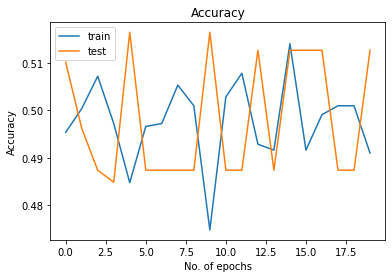

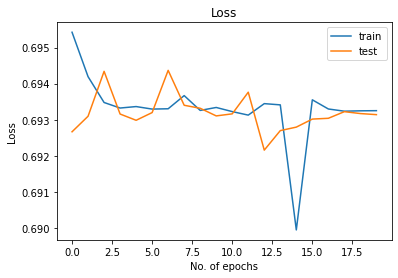

In [ ]:
# Model Fitting
history= model.fit(X_train, Y_train, epochs=20, batch_size=10, validation_split=0.33, verbose=2)
#Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.legend(["train","test"])
plt.title("Accuracy")
plt.show()

#Loss Plot 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.legend(["train","test"])
plt.title("Loss")
plt.show()

In [ ]:
#Testing the performance of the model
loss,accuracy=model.evaluate(X_test,Y_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4850


# Image Classification using Object of interest selection
This activity helps in grasping few image processing steps for potentially better performance of the neural network model.This steps uses edge detection,dilation and masking to segment object of interest.We will see the effects of these concepts on the images and later will use all these steps to preprocess images of the dataset.This activity will use the same steps as the previous activity except image processing step.

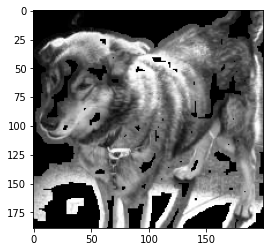

In [ ]:
# Dog Example
img=cv2.imread("drive/MyDrive/Colab/cat_dog/Dog/1022.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges=cv2.Canny(img, 100, 160)  #Canny Edge Detection method  
kernel = np.ones((7,7),np.uint8)  #kernel
edge1=cv2.dilate(edges,kernel,iterations=1) # dilation   
img3=cv2.bitwise_and(img,img,mask=edge1) # selecting object of interest
plt.imshow(img3,cmap='gray')
plt.show()

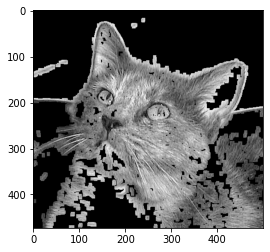

In [ ]:
# Dog Example
img=cv2.imread("drive/MyDrive/Colab/cat_dog/Cat/1022.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges=cv2.Canny(img, 100, 160)  #Canny Edge Detection method  
kernel = np.ones((7,7),np.uint8)  #kernel
edge1=cv2.dilate(edges,kernel,iterations=1) # dilation   
img3=cv2.bitwise_and(img,img,mask=edge1) # selecting object of interest
plt.imshow(img3,cmap='gray')
plt.show()

# Image Processing function
As learnt from the "Introduction to Python" let's create a function putting the image processing steps.

In [ ]:
def img_process(img):        
    edges=cv2.Canny(img, 100, 160)  #Canny Edge Detection method  
    kernel = np.ones((7,7),np.uint8)  #kernel
    edge1=cv2.dilate(edges,kernel,iterations=1)    
    img3=cv2.bitwise_and(img,img,mask=edge1) 
 
    return img3


# Image Preprocessing

In [ ]:
#DataSet Preparation
dir="drive/MyDrive/Colab/cat_dog"
categories=["Cat","Dog"]
data=[]
for i in os.listdir(dir):
    for j in os.listdir(os.path.join(dir,i)):
        if j.endswith(".jpg"):
            try:
                img=cv2.imread(os.path.join(dir,i,j))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #convert BGR2RGB
                img=cv2.resize(img,(30,30))# image resizing 
                img=img_process(img) # image processing
                feat=img.flatten()   #flatten the image to single vector
                feat=feat/255.0     #image normalization
                data.append([feat,categories.index(i)])
            except:
                pass

# Data Preprocessing

In [ ]:
# Splitting the data into features and corresponding labels
random.shuffle(data)   #shuffling of data
features=[]
labels=[]
#Spliting the data into features and corresponding labels:variable "features" will have all the features whereas all the label information is present in "labels" variable.
for i, j in data:
  features.append(i)
  labels.append(j)

features=np.array(features)
labels=np.array(labels)

#Printing the size of the dataset.
print("features size={},labels size={}".format(features.shape,labels.shape))
# One hot encoding
target=tf.keras.utils.to_categorical(labels)
print(target.shape)
features=features.reshape((-1,features.shape[1]))

X_train, X_test, Y_train, Y_test=train_test_split(features,target,test_size=0.2)

features size=(2999, 900),labels size=(2999,)
(2999, 2)


# Model Training and Testing

In [ ]:
model=tf.keras.Sequential()
model.add(Dense(256,activation='relu',kernel_initializer='glorot_uniform',input_shape=(features.shape[1],)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(2,activation='softmax'))

In [ ]:
#Model compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/20
161/161 - 1s - loss: 0.6969 - accuracy: 0.4866 - val_loss: 0.6931 - val_accuracy: 0.4836
Epoch 2/20
161/161 - 1s - loss: 0.6935 - accuracy: 0.5016 - val_loss: 0.6935 - val_accuracy: 0.4823
Epoch 3/20
161/161 - 1s - loss: 0.6933 - accuracy: 0.5233 - val_loss: 0.6939 - val_accuracy: 0.4836
Epoch 4/20
161/161 - 1s - loss: 0.6907 - accuracy: 0.5264 - val_loss: 0.6955 - val_accuracy: 0.4823
Epoch 5/20
161/161 - 1s - loss: 0.6905 - accuracy: 0.5389 - val_loss: 0.6892 - val_accuracy: 0.5379
Epoch 6/20
161/161 - 1s - loss: 0.6916 - accuracy: 0.5432 - val_loss: 0.6892 - val_accuracy: 0.5253
Epoch 7/20
161/161 - 1s - loss: 0.6850 - accuracy: 0.5638 - val_loss: 0.6942 - val_accuracy: 0.5253
Epoch 8/20
161/161 - 1s - loss: 0.6848 - accuracy: 0.5557 - val_loss: 0.7050 - val_accuracy: 0.4836
Epoch 9/20
161/161 - 1s - loss: 0.6801 - accuracy: 0.5750 - val_loss: 0.6825 - val_accuracy: 0.5694
Epoch 10/20
161/161 - 1s - loss: 0.6726 - accuracy: 0.5930 - val_loss: 0.6979 - val_accuracy: 0.5051

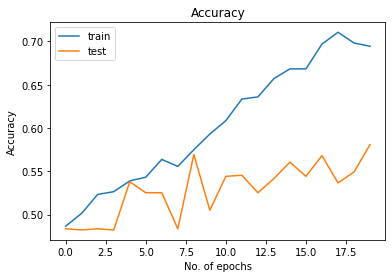

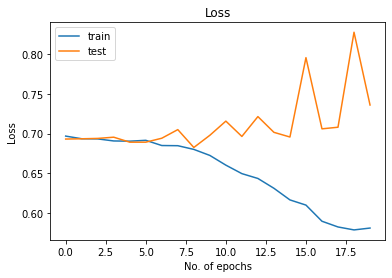

In [ ]:
# Model Fitting
history= model.fit(X_train, Y_train, epochs=20, batch_size=10, validation_split=0.33, verbose=2)
#Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.legend(["train","test"])
plt.title("Accuracy")
plt.show()

#Loss Plot 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.legend(["train","test"])
plt.title("Loss")
plt.show()

In [ ]:
#Testing the performance of the model
loss,accuracy=model.evaluate(X_test,Y_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.7241 - accuracy: 0.5683


# Image Classification using feature extraction Methods
Features are used to feed the abstract representation to the neural networks. Constructing suitable feature sets for classification task greatly enhances the ability of the neural network model to discriminate between two or more classes.In this activity,we will be looking at two major feature extraction methods:Scale invariant feature transform (SIFT),Speed up robust feature(SURF).

In [ ]:
#DataSet Preparation
dir="drive/MyDrive/Colab/cat_dog"
categories=["Cat","Dog"]
data=[]
for i in os.listdir(dir):
  for j in os.listdir(os.path.join(dir,i)):
    if j.endswith(".jpg"): 
          try: 
              img=cv2.imread(os.path.join(dir,i,j))
              img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  #convert BGR2RGB
              img=cv2.resize(img,(30,30))#image resize
              sift = cv2.xfeatures2d.SIFT_create(4)
              img=img_process(img)# image processing    
              keypoints,feat= sift.detectAndCompute(img, None)
              feat=feat.flatten()
              data.append([feat, categories.index(i)])
          except:
            pass



# Data Preprocessing

In [ ]:
# Splitting the data into features and corresponding labels
random.shuffle(data)   #shuffling of data
features=[]
labels=[]
#Spliting the data into features and corresponding labels:variable "features" will have all the features whereas all the label information is present in "labels" variable.
for i, j in data:
  features.append(i)
  labels.append(j)
  
# Storing the features in numpy array
max_len = max([len(i) for i in features])
sift_features=np.empty((0,max_len))
for i in features:
    i=np.array(i) 
    i= np.pad(i, (0, max_len-i.shape[0]), 'constant')    # padding the features with zeros for consistent dimensions 
    sift_features=np.vstack((sift_features,i))    #adding the features for each sample row by row


#Feature normalization/Scaling
sift_features=tf.keras.utils.normalize(sift_features, axis=-1, order=2)  #Feature scaling using L-2 norm

# One hot encoding
target=tf.keras.utils.to_categorical(labels)
sift_features=sift_features.reshape((-1,sift_features.shape[1]))

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(sift_features, target, test_size=0.2)
#Printing the size of the dataset.
print("features size={},labels size={}".format(sift_features.shape,target.shape))

features size=(2995, 896),labels size=(2995, 2)


# Model Training and Testing

In [ ]:
model=tf.keras.Sequential()
model.add(Dense(256,activation='relu',kernel_initializer='glorot_uniform',input_shape=(sift_features.shape[1],)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(2,activation='softmax'))

Epoch 1/20
161/161 - 1s - loss: 0.6937 - accuracy: 0.4879 - val_loss: 0.6931 - val_accuracy: 0.5082
Epoch 2/20
161/161 - 1s - loss: 0.6936 - accuracy: 0.4966 - val_loss: 0.6935 - val_accuracy: 0.4918
Epoch 3/20
161/161 - 1s - loss: 0.6928 - accuracy: 0.5184 - val_loss: 0.6934 - val_accuracy: 0.4968
Epoch 4/20
161/161 - 1s - loss: 0.6903 - accuracy: 0.5146 - val_loss: 0.6930 - val_accuracy: 0.5145
Epoch 5/20
161/161 - 1s - loss: 0.6800 - accuracy: 0.5626 - val_loss: 0.7054 - val_accuracy: 0.4994
Epoch 6/20
161/161 - 1s - loss: 0.6672 - accuracy: 0.5925 - val_loss: 0.7307 - val_accuracy: 0.4968
Epoch 7/20
161/161 - 1s - loss: 0.6334 - accuracy: 0.6455 - val_loss: 0.7529 - val_accuracy: 0.4842
Epoch 8/20
161/161 - 1s - loss: 0.5861 - accuracy: 0.6741 - val_loss: 0.8142 - val_accuracy: 0.4968
Epoch 9/20
161/161 - 1s - loss: 0.5303 - accuracy: 0.7109 - val_loss: 1.0186 - val_accuracy: 0.4678
Epoch 10/20
161/161 - 1s - loss: 0.4337 - accuracy: 0.7807 - val_loss: 1.2174 - val_accuracy: 0.4716

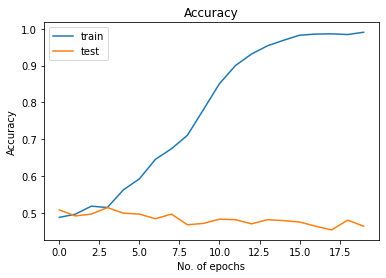

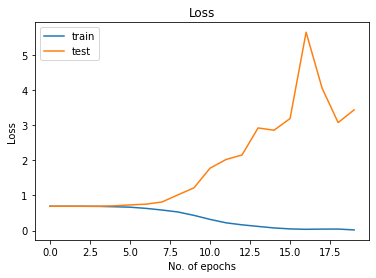

In [ ]:
#Model compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Model Fitting
history= model.fit(X_train, Y_train, epochs=20, batch_size=10,validation_split=0.33, verbose=2)
#Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.legend(["train","test"])
plt.title("Accuracy")
plt.show()

#Loss Plot 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.legend(["train","test"])
plt.title("Loss")
plt.show()


In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)

19/19 [==============================] - 0s 2ms/step - loss: 3.1269 - accuracy: 0.4875


# SURF Features detection and classification

In [ ]:
#DataSet Preparation
dir="drive/MyDrive/Colab/cat_dog"
categories=["Cat","Dog"]
data=[]
for i in os.listdir(dir):
  for j in os.listdir(os.path.join(dir,i)):
    if j.endswith(".jpg"): 
          try: 
              img=cv2.imread(os.path.join(dir,i,j))
              img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #convert BGR2RGB
              img=cv2.resize(img,(40,40))#resize
              detector = cv2.xfeatures2d_SURF.create()                 
              keypoints,feat = detector.detectAndCompute(img, None)
              feat=feat.flatten()              
              data.append([feat, categories.index(i)])
          except:
            pass


# Data Preprocessing

In [ ]:
# Splitting the data into features and corresponding labels
random.shuffle(data)   #shuffling of data
features=[]
labels=[]
#Spliting the data into features and corresponding labels:variable "features" will have all the features whereas all the label information is present in "labels" variable.
for i, j in data:
  features.append(i)
  labels.append(j)
  
# Storing the features in numpy array
max_len = max([len(i) for i in features])
surf_features=np.empty((0,max_len))
for i in features:
    i=np.array(i) 
    i= np.pad(i, (0, max_len-i.shape[0]), 'constant')    # padding the features with zeros for consistent dimensions 
    surf_features=np.vstack((surf_features,i))    #adding the features for each sample row by row


#Feature normalization/Scaling
surf_features=tf.keras.utils.normalize(surf_features, axis=-1, order=2)  #Feature scaling using L-2 norm

# One hot encoding
target=tf.keras.utils.to_categorical(labels)
surf_features=surf_features.reshape((-1,surf_features.shape[1]))

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(surf_features, target, test_size=0.2)
#Printing the size of the dataset.
print("features size={},labels size={}".format(surf_features.shape,target.shape))

features size=(2755, 512),labels size=(2755, 2)


In [ ]:
model=tf.keras.Sequential()
model.add(Dense(256,activation='relu',kernel_initializer='glorot_uniform',input_shape=(surf_features.shape[1],)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(2,activation='softmax'))

Epoch 1/20
148/148 - 1s - loss: 0.6936 - accuracy: 0.5061 - val_loss: 0.6962 - val_accuracy: 0.4794
Epoch 2/20
148/148 - 1s - loss: 0.6934 - accuracy: 0.5068 - val_loss: 0.6943 - val_accuracy: 0.4794
Epoch 3/20
148/148 - 1s - loss: 0.6933 - accuracy: 0.5095 - val_loss: 0.6938 - val_accuracy: 0.4794
Epoch 4/20
148/148 - 1s - loss: 0.6932 - accuracy: 0.5095 - val_loss: 0.6943 - val_accuracy: 0.4794
Epoch 5/20
148/148 - 1s - loss: 0.6932 - accuracy: 0.5095 - val_loss: 0.6940 - val_accuracy: 0.4794
Epoch 6/20
148/148 - 1s - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6942 - val_accuracy: 0.4794
Epoch 7/20
148/148 - 1s - loss: 0.6932 - accuracy: 0.5095 - val_loss: 0.6944 - val_accuracy: 0.4794
Epoch 8/20
148/148 - 1s - loss: 0.6930 - accuracy: 0.5068 - val_loss: 0.6939 - val_accuracy: 0.4794
Epoch 9/20
148/148 - 0s - loss: 0.6926 - accuracy: 0.5115 - val_loss: 0.6951 - val_accuracy: 0.4794
Epoch 10/20
148/148 - 1s - loss: 0.6925 - accuracy: 0.5210 - val_loss: 0.6960 - val_accuracy: 0.4918

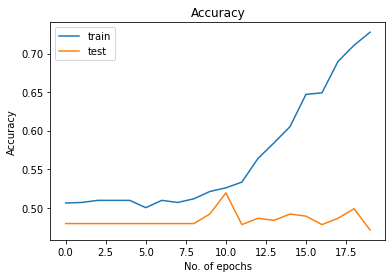

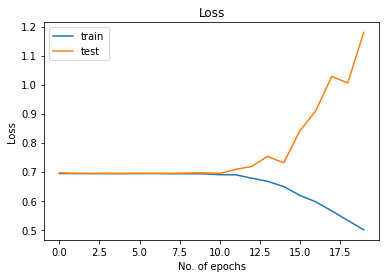

In [ ]:
#Model compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Model Fitting
history= model.fit(X_train, Y_train, epochs=20, batch_size=10,validation_split=0.33, verbose=2)
#Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.legend(["train","test"])
plt.title("Accuracy")
plt.show()

#Loss Plot 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.legend(["train","test"])
plt.title("Loss")
plt.show()


In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1.0150 - accuracy: 0.5045
